Link to Overleaf doc:
https://www.overleaf.com/1457348731wqmsfnqpynqw

# Project 4 : Regression Analysis

### Importing Libraries

In [1]:
from itertools import cycle
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random 
random.seed(42)
from sklearn.linear_model import LinearRegression as reg

## Dataset 1

### Question 1, Loading the data

In [3]:
# Read data
dataset1 = pd.read_csv('datasets/network_backup_dataset.csv')

In [11]:
print(np.max(dataset1['Size of Backup (GB)']))

1.0088265817605462


In [4]:
dataset1.head(10)

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,Monday,1,work_flow_0,File_0,0.0,0
1,1,Monday,1,work_flow_2,File_12,0.0,0
2,1,Monday,1,work_flow_2,File_13,0.0,0
3,1,Monday,1,work_flow_2,File_14,0.0,0
4,1,Monday,1,work_flow_2,File_16,0.0,0
5,1,Monday,1,work_flow_2,File_17,0.0,0
6,1,Monday,1,work_flow_3,File_18,0.0,0
7,1,Monday,1,work_flow_3,File_19,0.0,0
8,1,Monday,1,work_flow_3,File_20,0.0,0
9,1,Monday,1,work_flow_3,File_21,0.0,0


In [6]:
#PERFORM SCALAR ENCODING
# Read data
dataset1 = pd.read_csv('datasets/network_backup_dataset.csv')

#replace days of week with numbers 1-7
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
q2_days = 0
for day in days_of_week:
    q2_days += 1
    dataset1.loc[dataset1['Day of Week'] == day, 'Day of Week'] = q2_days
    
#replace 'Work-Flow-ID' with numbers 1-5
q2_id = 0
wrkflw_id = np.unique(dataset1['Work-Flow-ID'])
for wrkflwid in wrkflw_id:
    q2_id += 1
    dataset1.loc[dataset1['Work-Flow-ID'] == wrkflwid, 'Work-Flow-ID'] = q2_id
    
#replace 'Hour of the Day' 
q2_id = 0
wrkflw_id = np.unique(dataset1['Backup Start Time - Hour of Day'])
for wrkflwid in wrkflw_id:
    q2_id += 1
    dataset1.loc[dataset1['Backup Start Time - Hour of Day'] == wrkflwid, 'Backup Start Time - Hour of Day'] = q2_id
    
#replace 'File Name' with numbers 1-30
q2_nm = 0
file_name = ['File_0',  'File_1',  'File_2',  'File_3',  'File_4',  'File_5',  'File_6', 
             'File_7',  'File_8',  'File_9',  'File_10', 'File_11', 'File_12', 'File_13', 
             'File_14', 'File_15', 'File_16', 'File_17', 'File_18', 'File_19', 'File_20', 
             'File_21', 'File_22', 'File_23', 'File_24', 'File_25', 'File_26', 'File_27',
             'File_28', 'File_29']
for fl_nm in file_name:
    q2_nm += 1
    dataset1.loc[dataset1['File Name'] == fl_nm, 'File Name'] = q2_nm
    
#replace 'Week Numer' with numbers 
q2_id = 0
wrkflw_id = np.unique(dataset1['Week #'])
for wrkflwid in wrkflw_id:
    q2_id += 1
    dataset1.loc[dataset1['Week #'] == wrkflwid,'Week #'] = q2_id
        


    
#Backup Stat Time - Hour of Day already scalar
#Backup Time (hour) already scalar
    
    
#Add a column with the day number to all entries
data_q1 = dataset1
week_col = data_q1['Week #']
day_column = data_q1['Day of Week']
day = []
for i in range(0, 18588):
    day.append((week_col[i]-1)*7+day_column[i])
data_q1.insert(2, 'Day', day)

#### Question 1.a

In [16]:
dataframe = dataset1.groupby(['Day', 'Work-Flow-ID'])['Size of Backup (GB)'].sum()

Text(0.5, 1.0, 'Day Number vs Size of Backup')

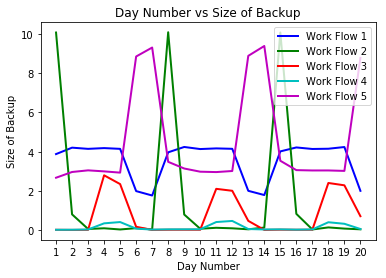

In [17]:
num_work_ids = len(np.unique(dataset1['Work-Flow-ID']))
num_days = 20
color_list = ['b', 'g', 'r', 'c', 'm']
for i in range(num_work_ids):
    sizes_work_id = dataframe[i:num_work_ids*num_days+i:num_work_ids].values
    plt.plot(range(1, num_days+1), sizes_work_id, linewidth = 2.0, c = color_list[i], label = 'Work Flow '+str(i+1))
plt.legend()    
plt.xticks(range(1, num_days+1))
plt.xlabel('Day Number')
plt.ylabel('Size of Backup')
plt.title('Day Number vs Size of Backup')

#### Question 1.b

Text(0.5, 1.0, 'Day Number vs Size of Backup')

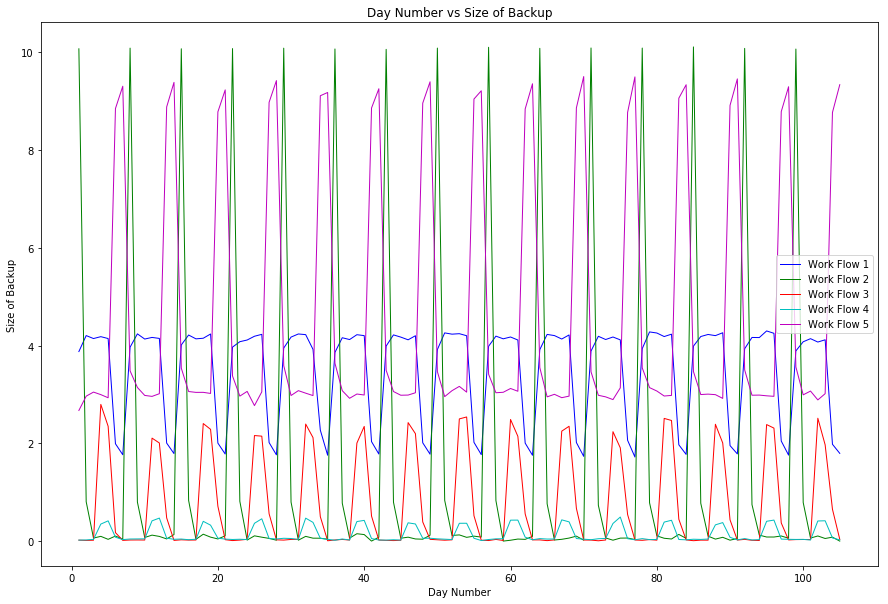

In [9]:
num_work_ids = len(np.unique(dataset1['Work-Flow-ID']))
num_days = 105
color_list = ['b', 'g', 'r', 'c', 'm']
plt.figure(figsize=(15, 10))
for i in range(num_work_ids):
    sizes_work_id = dataframe[i:num_work_ids*num_days+i:num_work_ids].values
    plt.plot(range(1, num_days+1), sizes_work_id, linewidth = 1.0, c = color_list[i], label = 'Work Flow '+str(i+1))
plt.legend()    
#plt.xticks(range(1, num_days+1))
plt.xlabel('Day Number')
plt.ylabel('Size of Backup')
plt.title('Day Number vs Size of Backup')

#### Question 1.c

Yes there is a pattern that which clearly repeats. The period is of the pattern is 7, that is Workflow pattern are same each day of the week.

### Question 2, Predict

#### Part-(a) Linear Models

In [86]:
#### from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

# Prepare the data:
#col 0 = Week #
#col 1 = Day of Week
#col 2 = day (??)
#col 3 = Hour of Day
#col 4 = Work flow ID
#col 5 = File Name/#
#col 6 = Size of Backup
#col 7 = Backuptime
X_data = dataset1.values[:, [0, 1, 2, 3, 4]]
y_data = dataset1.values[:, [5]] #backupsize = goal for prediction

# 10 fold cross validation:
linear_reg = LinearRegression()

cv_results = cross_validate(linear_reg, X_data, y_data, cv=10,
                        scoring='neg_mean_squared_error', return_train_score=True)

In [87]:
linear_train_mse = -cv_results['train_score']
linear_test_mse = -cv_results['test_score']
linear_train_rmse = np.sqrt(linear_train_mse)
linear_test_rmse = np.sqrt(linear_test_mse)
for rmse in linear_train_rmse:
    print('Training set RMSE is {}'.format(rmse))
    
for rmse in linear_test_rmse:
    print('Test set RMSE is {}'.format(rmse))

print('\nAverage RMSE on Train dataset: {:.5f}' .format(np.sqrt(np.mean(linear_train_mse))))
print('Average RMSE on Test dataset: {:.5f}' .format(np.sqrt(np.mean(linear_test_mse))))

Training set RMSE is 1.707778305370077
Training set RMSE is 1.7084732194947716
Training set RMSE is 1.7081423858664604
Training set RMSE is 1.7080583518781438
Training set RMSE is 1.7079542548761066
Training set RMSE is 1.7082588070374298
Training set RMSE is 1.7080559723807713
Training set RMSE is 1.7078482487679623
Training set RMSE is 1.7080480741042299
Training set RMSE is 1.7080620808527558
Test set RMSE is 1.7098193326518443
Test set RMSE is 1.705116404357511
Test set RMSE is 1.7077267900671185
Test set RMSE is 1.7073001769327085
Test set RMSE is 1.709191145904742
Test set RMSE is 1.7063507227822714
Test set RMSE is 1.708587115192138
Test set RMSE is 1.7091905475094018
Test set RMSE is 1.7089561776139315
Test set RMSE is 1.7087507921263478

Average RMSE on Train dataset: 1.70807
Average RMSE on Test dataset: 1.70810


In [88]:
# Use complete dataset and plot the obseved vs true and residual vs observed plots
linear_reg.fit(X_data, y_data)
y_est_lin = linear_reg.predict(X_data)

Text(0.5, 1.0, 'Predictions vs True values')

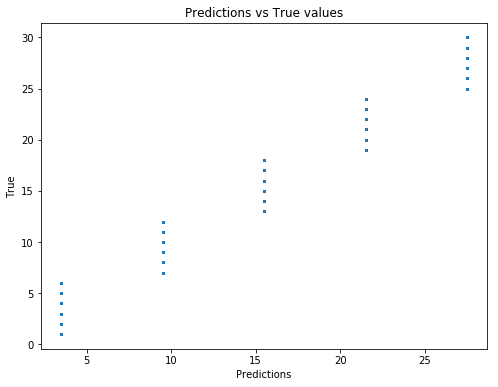

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(y_est_lin, y_data, s=2)
#plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()],'k--', lw=3,label='actual ', )
plt.ylabel('True')
plt.xlabel('Predictions')
plt.title('Predictions vs True values')

#plt.plot(y_est,label='true values')
##plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()],'k--', lw=3,label='actual ', )
#plt.xlabel('True')
#plt.ylabel('Predictions')
#plt.title('Predictions vs True values')
#plt.legend(loc='upper left')

Text(0.5, 1.0, 'Residual vs Predicted Values')

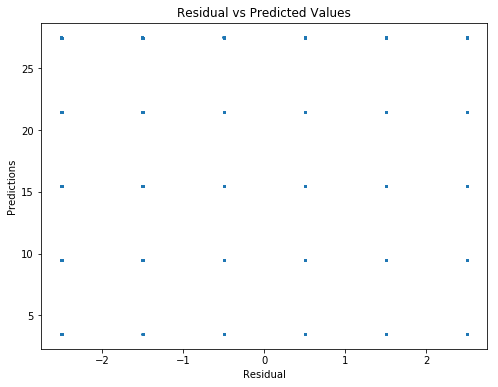

In [92]:
plt.figure(figsize=(8, 6))
plt.scatter(y_data-y_est_lin, y_est_lin, s=2)
# plt.plot([y_data.min(), y_data.max()], [0, 0], 'k--', lw=3)
plt.xlabel('Residual')
plt.ylabel('Predictions')
plt.title('Residual vs Predicted Values')

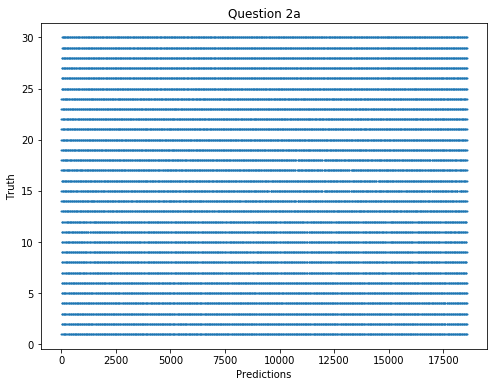

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(y_data)),y_data, s=1)
#plt.plot(np.arange(len(y_data)),y_est_lin,label='predicted data')
plt.xlabel('Predictions')
plt.ylabel('Truth')
plt.title('Question 2a')
#plt.legend()
plt.show()

**Random forest regression**

In [98]:
#QUESTION 2bi
# Random forest regression:


# Prepare the data:
#col 0 = Week #
#col 1 = Day of Week
#col 2 = day (??)
#col 3 = Hour of Day
#col 4 = Work flow ID
#col 5 = File Name/#
#col 6 = Size of Backup
#col 7 = Backuptime
X_data = dataset1.values[:, [0, 1, 2, 3, 4]]
y_data = dataset1.values[:, [5]] #backupsize = goal for prediction



from sklearn.ensemble import RandomForestRegressor
forestReg_est = RandomForestRegressor(max_depth=4, n_estimators=20, max_features=5,
                                      bootstrap=True, oob_score=False)

forest_cv_results = cross_validate(forestReg_est, X_data, y_data.ravel(), cv=10,
                scoring='neg_mean_squared_error', return_train_score=True)
forest_cv_results

{'fit_time': array([0.22047162, 0.17857432, 0.14665198, 0.15164256, 0.15562296,
        0.1745832 , 0.18156719, 0.15961647, 0.15462995, 0.14264989]),
 'score_time': array([0.00399065, 0.00199294, 0.00299239, 0.00299239, 0.00199246,
        0.00299287, 0.00299311, 0.00299335, 0.00299382, 0.00299382]),
 'test_score': array([-2.93058636, -2.9066726 , -2.91617686, -2.91508871, -2.92176046,
        -2.91198691, -2.91953444, -2.92202972, -2.92001373, -2.9216944 ]),
 'train_score': array([-2.91698087, -2.91882551, -2.91798458, -2.91804685, -2.91726808,
        -2.91838403, -2.91759893, -2.91724078, -2.91751428, -2.91754076])}

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
forest_train_mse = -forest_cv_results['train_score']
forest_test_mse = -forest_cv_results['test_score']
forest_train_rmse = np.sqrt(forest_train_mse)
forest_test_rmse = np.sqrt(forest_test_mse)

for rmse in forest_train_rmse:
    print('Random forest Training set RMSE is {}'.format(rmse))
print('')
for rmse in forest_test_rmse:
    print('Random forest Test set RMSE is {}'.format(rmse))
    
print('\n2bi answers')
print('Average RMSE on Train dataset: {:.5f}'.format(np.sqrt(np.mean(forest_train_mse))))
print('Average RMSE on Test dataset:  {:.5f}'.format(np.sqrt(np.mean(forest_test_mse))))

# train on complete data: ;; how much this makes sense
forestReg_est = RandomForestRegressor(max_depth=4, n_estimators=20, max_features=5,
                                      bootstrap=True, oob_score=True)
forestReg_est.fit(X_data, y_data.ravel())

print('\nOut of Bag Error: {}'.format(1-forestReg_est.oob_score_))

Random forest Training set RMSE is 1.7079171159430908
Random forest Training set RMSE is 1.7084570558668835
Random forest Training set RMSE is 1.7082109283582785
Random forest Training set RMSE is 1.7082291562822176
Random forest Training set RMSE is 1.708001192933414
Random forest Training set RMSE is 1.7083278465806295
Random forest Training set RMSE is 1.7080980439751796
Random forest Training set RMSE is 1.707993202215055
Random forest Training set RMSE is 1.7080732640002114
Random forest Training set RMSE is 1.7080810175444723

Random forest Test set RMSE is 1.7118955468673738
Random forest Test set RMSE is 1.7048966544472017
Random forest Test set RMSE is 1.707681721635477
Random forest Test set RMSE is 1.7073630863249472
Random forest Test set RMSE is 1.7093157881889585
Random forest Test set RMSE is 1.706454484065867
Random forest Test set RMSE is 1.7086645186323195
Random forest Test set RMSE is 1.7093945480419608
Random forest Test set RMSE is 1.7088047679526566
Random forest

In [ ]:
#QUESTION 2bii
# train, test split of data:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1)
grid_forestReg_est = RandomForestRegressor(n_estimators=5, max_features=5, max_depth=4,
                                           bootstrap=True, oob_score=True)
array_oob_error = np.zeros([5, 200])
array_rmse = np.zeros([5, 200])

for i, max_feat in zip(range(5), range(1, 6)):
    print('fitting with {} number of max features'.format(max_feat))
    for j, n_est in zip(range(200), range(1, 201)):
        # oob error:
        grid_forestReg_est.set_params(n_estimators=n_est, max_features=max_feat)
        grid_forestReg_est.fit(X_data, y_data.ravel())
        oob_error = 1-grid_forestReg_est.oob_score_
        array_oob_error[i, j] = oob_error
        # mse:
        y_pred = grid_forestReg_est.predict(X_test)
        mse = np.sqrt(mean_squared_error(y_test, y_pred))
        array_rmse[i, j] = mse

fitting with 1 number of max features
fitting with 2 number of max features
fitting with 3 number of max features
fitting with 4 number of max features
fitting with 5 number of max features


In [ ]:
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(range(1, 201), array_rmse[i, :], label='max features = '+str(i+1))
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.title('Question 2bii')
plt.legend()
print('optimal around number of features = 3 and number of trees =22')

In [28]:
ind = np.unravel_index(np.argmin(array_rmse, axis=None), array_rmse.shape)
print(ind)

(4, 30)


In [29]:
best_num_feats = ind[0]+1
best_num_est = ind[1]+1

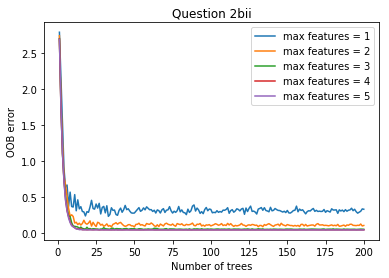

In [30]:
for i in range(5):
    plt.plot(range(1, 201), array_oob_error[i, :], label='max features = '+str(i+1))
plt.xlabel('Number of trees')
plt.ylabel('OOB error')
plt.title('Question 2bii')
plt.legend()

We choose to experiment to max_depth and min_impurity_decrease

In [31]:
#QUESTION 2biii
# train, test split of data:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1)
grid_forestReg_est_depth = RandomForestRegressor(n_estimators=best_num_est, max_features=best_num_feats, max_depth=4,
                                               bootstrap=True, oob_score=True)
array_oob_error_depth = np.zeros([25])
array_train_rmse_depth = np.zeros([25])
array_test_rmse_depth = np.zeros([25])

for i, max_depth in zip(range(25), range(1, 26)):
    # oob error:
    grid_forestReg_est_depth.set_params(max_depth=max_depth)
    grid_forestReg_est_depth.fit(X_train, y_train)
    oob_error = 1-grid_forestReg_est_depth.oob_score_
    array_oob_error_depth[i] = oob_error
    # test mse:
    y_test_pred = grid_forestReg_est_depth.predict(X_test)
    test_mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    array_test_rmse_depth[i] = test_mse
    # train mse:
    y_train_pred = grid_forestReg_est_depth.predict(X_train)
    train_mse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    array_train_rmse_depth[i] = train_mse    

Would choose ~9 max depth for best performance


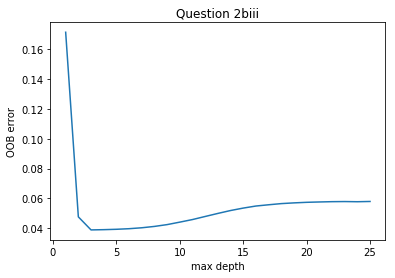

In [32]:
plt.plot(range(1, 26), array_oob_error_depth)
plt.xlabel('max depth')
plt.ylabel('OOB error')
plt.title('Question 2biii')
print('Would choose ~9 max depth for best performance')

Would choose ~9 max depth for best performance


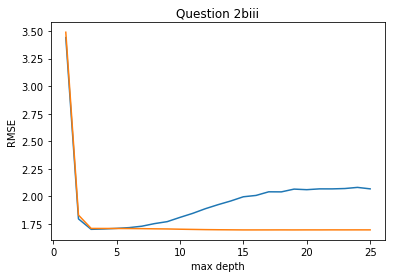

In [33]:
plt.plot(range(1, 26), array_test_rmse_depth, label='test')
plt.plot(range(1, 26), array_train_rmse_depth, label='train')
plt.xlabel('max depth')
plt.ylabel('RMSE')
plt.title('Question 2biii')
print('Would choose ~9 max depth for best performance')

In [34]:
#QUESTION 2biv
grid_forestReg_best = RandomForestRegressor(n_estimators=best_num_est, max_features=best_num_feats, max_depth=4,
                                               bootstrap=True, oob_score=True)

grid_forestReg_best.fit(X_train, y_train)
importances = grid_forestReg_best.feature_importances_
print('QUESTION 1biv')
print('FEATURE IMPORTANCES')
print(np.argsort(importances))
print('best number of estimators', best_num_est)
print('best number of features',best_num_feats)

QUESTION 1biv
FEATURE IMPORTANCES
[0 3 1 2 4]
best number of estimators 31
best number of features 5


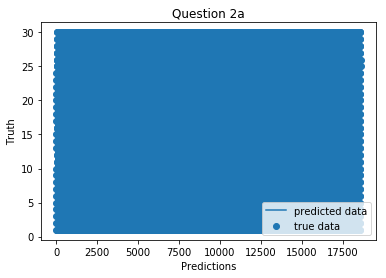

In [38]:
#QUESTION 2bv
#copy so i dont have to run everything again to test 2bv
# train, test split of data:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

grid_forestReg_best = RandomForestRegressor(n_estimators=22, max_features=3, max_depth=4,
                                               bootstrap=True, oob_score=True)


y_est_for=grid_forestReg_best.fit(X_data, y_data).predict(X_data)
importances = grid_forestReg_best.feature_importances_


plt.scatter(np.arange(len(y_data)),y_data,label='true data')
plt.plot(np.arange(len(y_data)),y_est_for,label='predicted data')
plt.xlabel('Predictions')
plt.ylabel('Truth')
plt.title('Question 2a')
plt.legend()
plt.show()

In [44]:
#QUESTION 2bv
from sklearn import tree
#Will need to download python-graphviz (not standard in Anaconda)
from sklearn.tree import export_graphviz
print('Question 2bv Decision Tree Visualization')

export_graphviz(grid_forestReg_best.estimators_[0], out_file='tree')

#Which is root node?
#TIs this the most important feature according to importance from regressor above?
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
import os
os.system('dot -Tpng tree.dot -o tree.png')

#from subprocess import check_call
#check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

from IPython.display import Image
Image(filename='tree.png')

Question 2bv Decision Tree Visualization


FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

![](tree.png)

**Part-(c) Neural Networks**

In [45]:
# MAKE ONE HOT ENCODING
# Read data
dataset2 = pd.read_csv('network_backup_dataset.csv')

# DAY OF THE WEEK
#make week dictionary
onehot_week={'Monday':   [1,0,0,0,0,0,0],
             'Tuesday':  [0,1,0,0,0,0,0],
             'Wednesday':[0,0,1,0,0,0,0],
             'Thursday': [0,0,0,1,0,0,0],
             'Friday':   [0,0,0,0,1,0,0],
             'Saturday': [0,0,0,0,0,1,0],
             'Sunday':   [0,0,0,0,0,0,1]}

#replace week days
dataset2['Day of Week']=dataset2['Day of Week'].map(onehot_week)

#WORK-FLOW-ID
#make work flow id dictionary
wrkflw_num = 0
wrkflw_id = np.unique(dataset2['Work-Flow-ID'])
onehot_flow={}
for wrkflwid in wrkflw_id:
    this_flow=np.zeros(len(wrkflw_id),dtype=int)
    this_flow[wrkflw_num]=1
    onehot_flow[wrkflwid] = this_flow
    wrkflw_num += 1

#replace work flow id
dataset2['Work-Flow-ID']=dataset2['Work-Flow-ID'].map(onehot_flow)

#FILE NAME
#make file name disctionary
file_num = 0
file_name = ['File_0',  'File_1',  'File_2',  'File_3',  'File_4',  'File_5',  'File_6', 
             'File_7',  'File_8',  'File_9',  'File_10', 'File_11', 'File_12', 'File_13', 
             'File_14', 'File_15', 'File_16', 'File_17', 'File_18', 'File_19', 'File_20', 
             'File_21', 'File_22', 'File_23', 'File_24', 'File_25', 'File_26', 'File_27',
             'File_28', 'File_29']
onehot_file={}
for fl_nm in file_name:
    this_file = np.zeros(len(file_name),dtype=int)
    this_file[file_num]=1
    onehot_file[fl_nm] = this_file
    file_num += 1
    
#replace file name
dataset2['File Name']=dataset2['File Name'].map(onehot_file)

#HOURS OF THE DAY
#make Hour of the Day dictionary
start_num = 0
start_id = np.unique(dataset2['Backup Start Time - Hour of Day'])
onehot_start={}
for start in start_id:
    this_start=np.zeros(len(start_id),dtype=int)
    this_start[start_num]=1
    onehot_start[start] = this_start
    start_num += 1
    
#replace Hour of the Day days
dataset2['Backup Start Time - Hour of Day']=dataset2['Backup Start Time - Hour of Day'].map(onehot_start)

#make Week number dictionary
size_num = 0
size_id = np.unique(dataset2['Week #'])
onehot_size={}
for size in size_id:
    this_size=np.zeros(len(size_id),dtype=int)
    this_size[size_num]=1
    onehot_size[size] = this_size
    size_num += 1
    
#replace Backup time days
dataset2['Week #']=dataset2['Week #'].map(onehot_size)



# Prepare the data:
X_data = dataset2.values[:, [0, 1, 3, 4, 6]]
y_data = dataset2.values[:, [5]] # the size of backup (which are trying to predict)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1)

print(X_data)
#print('--------------------')
#print(y_data)
print(dataset2)

[[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([1, 0, 0, 0, 0, 0, 0]) array([1, 0, 0, 0, 0])
  array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])
  0]
 [array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([1, 0, 0, 0, 0, 0, 0]) array([0, 0, 1, 0, 0])
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])
  0]
 [array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([1, 0, 0, 0, 0, 0, 0]) array([0, 0, 1, 0, 0])
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])
  0]
 ...
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
  list([0, 0, 0, 0, 0, 0, 1]) array([0, 0, 0, 0, 1])
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])
  2]
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
  list([0, 0, 0, 0, 0, 0, 1]) array([0, 0, 0, 0, 1])
  array

In [46]:
print(X_data)
from sklearn.preprocessing import OneHotEncoder

# Read data
dataset2 = pd.read_csv('network_backup_dataset.csv')
# Prepare the data:
X_data = dataset1.values[:, [0, 1, 2, 3, 4]]
y_data = dataset1.values[:, [5]] #backupsize = goal for prediction

# X is a numpy array with your features
# y is the label array
enc = OneHotEncoder(sparse=False)
X_transform = enc.fit_transform(X_data)

# apply your linear regression as you want
model = MLPRegressor()
model.fit(X_transform, y_data)

print(X_transform)
print(X_transform.shape)

[[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([1, 0, 0, 0, 0, 0, 0]) array([1, 0, 0, 0, 0])
  array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])
  0]
 [array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([1, 0, 0, 0, 0, 0, 0]) array([0, 0, 1, 0, 0])
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])
  0]
 [array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  list([1, 0, 0, 0, 0, 0, 0]) array([0, 0, 1, 0, 0])
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])
  0]
 ...
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
  list([0, 0, 0, 0, 0, 0, 1]) array([0, 0, 0, 0, 1])
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])
  2]
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
  list([0, 0, 0, 0, 0, 0, 1]) array([0, 0, 0, 0, 1])
  array

NameError: name 'MLPRegressor' is not defined

In [47]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

list_num_hid = [2, 5, 10, 50, 100, 150, 200] + list(range(250, 650, 50))

mlp_train_rmse_list = np.zeros([3, len(list_num_hid)])
mlp_test_rmse_list = np.zeros([3, len(list_num_hid)])

for i, activation_fn in zip(range(3), ['relu', 'logistic', 'tanh']):
    for j, num_hid in zip(range(len(list_num_hid)), list_num_hid):
        mlp_reg = MLPRegressor(hidden_layer_sizes=(num_hid), activation=activation_fn)
        mlp_cv_results = cross_validate(mlp_reg, X_transform, y_data, cv=10,
                        scoring='neg_mean_squared_error', return_train_score=True)
    
        mlp_train_mse = -mlp_cv_results['train_score']
        mlp_test_mse = -mlp_cv_results['test_score']
        
        mlp_train_rmse_list[i, j] = np.sqrt(np.mean(mlp_train_mse))
        mlp_test_rmse_list[i, j]  = np.sqrt(np.mean(mlp_test_mse))

Would choose logistics and 2 hidden units for best performance


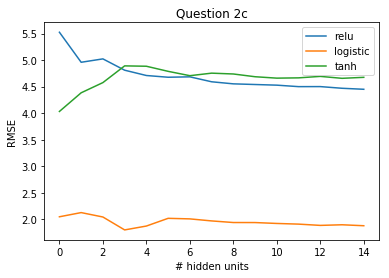

In [48]:
plt.plot(np.arange(len(list_num_hid)), mlp_test_rmse_list[0,:], label='relu')
plt.plot(np.arange(len(list_num_hid)), mlp_test_rmse_list[1,:], label='logistic')
plt.plot(np.arange(len(list_num_hid)), mlp_test_rmse_list[2,:], label='tanh')
plt.xlabel('# hidden units')
plt.ylabel('RMSE')
plt.title('Question 2c')
plt.legend()
print('Would choose logistics and 2 hidden units for best performance')

In [49]:
#rerun best performer
hidden_layer_opt=2
activation_opt='logistic'
mlp_reg = MLPRegressor(hidden_layer_sizes=hidden_layer_opt, activation=activation_opt)
mlp_reg.fit(X_transform,y_data)
y_pred=mlp_reg.predict(X_transform)

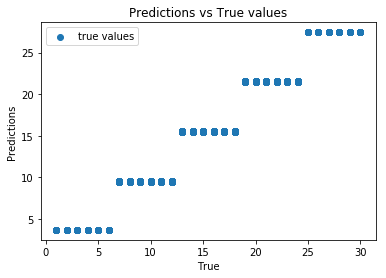

In [50]:
plt.scatter(y_data, y_pred,label='true values')
#plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()],'k--', lw=3,label='prediction', )
plt.xlabel('True')
plt.ylabel('Predictions')
plt.title('Predictions vs True values')
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Residual vs True')

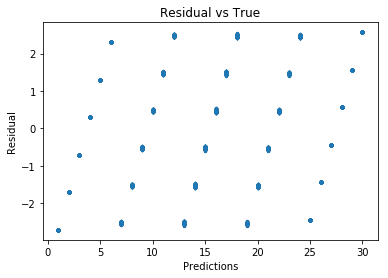

In [51]:
plt.scatter(y_data, y_data[:,0]-y_pred,s=5)
# plt.plot([y_data.min(), y_data.max()], [0, 0], 'k--', lw=3)
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.title('Residual vs True')

**Part-(d) Predict Backup size**

In [52]:
#PERFORM SCALAR ENCODING
# Read data
dataset1 = pd.read_csv('network_backup_dataset.csv')

#replace days of week with numbers 1-7
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
q2_days = 0
for day in days_of_week:
    q2_days += 1
    dataset1.loc[dataset1['Day of Week'] == day, 'Day of Week'] = q2_days
    
#replace 'Work-Flow-ID' with numbers 1-5
q2_id = 0
wrkflw_id = np.unique(dataset1['Work-Flow-ID'])
for wrkflwid in wrkflw_id:
    q2_id += 1
    temp=[]
    temp=dataset1.loc[dataset1['Work-Flow-ID'] == wrkflwid, 'Work-Flow-ID']

    dataset1.loc[dataset1['Work-Flow-ID'] == wrkflwid, 'Work-Flow-ID'] = q2_id
    
#replace 'Hour of the Day' 
q2_id = 0
wrkflw_id = np.unique(dataset1['Backup Start Time - Hour of Day'])
for wrkflwid in wrkflw_id:
    q2_id += 1
    dataset1.loc[dataset1['Backup Start Time - Hour of Day'] == wrkflwid, 'Backup Start Time - Hour of Day'] = q2_id
    
#replace 'File Name' with numbers 1-30
q2_nm = 0
file_name = ['File_0',  'File_1',  'File_2',  'File_3',  'File_4',  'File_5',  'File_6', 
             'File_7',  'File_8',  'File_9',  'File_10', 'File_11', 'File_12', 'File_13', 
             'File_14', 'File_15', 'File_16', 'File_17', 'File_18', 'File_19', 'File_20', 
             'File_21', 'File_22', 'File_23', 'File_24', 'File_25', 'File_26', 'File_27',
             'File_28', 'File_29']
for fl_nm in file_name:
    q2_nm += 1
    dataset1.loc[dataset1['File Name'] == fl_nm, 'File Name'] = q2_nm
    


In [53]:
#QUESTION 2di

# Prepare the data:
#col 0 = Week #
#col 1 = Day of Week
#col 2 = day (??)
#col 3 = Hour of Day
#col 4 = Work flow ID
#col 5 = File Name/#
#col 6 = Size of Backup
#col 7 = Backuptime
X_data = dataset1.values[:, [0, 1, 2, 3, 4]]
y_data = dataset1.values[:, [5]] #backupsize = goal for prediction

#get all workflows
linear_reg = LinearRegression()
linear_reg.fit(X_data,y_data)
y_pred_all=linear_reg.predict(X_data)


#print('unique outputs\n',np.unique(y_data))
#print('unique flow IDs\n',np.unique(X_data[:,2]))
#print('All input data\n',X_data)
#print('------------------------\n'*2)
true=[]
pred=[]
label=[]
for flow in np.unique(X_data[:,2]):
    # 10 fold cross validation:
    this_flow=[]
    this_flow=X_data[X_data[:,2]==flow,:]
    #print('this flows dataset',this_flow)
    this_out=y_data[X_data[:,2]==flow]
    #print('this flows output',this_out)
    #print('------------------------')
    linear_reg = LinearRegression()
    linear_reg.fit(this_flow,this_out)
    y_pred=linear_reg.predict(this_flow)
    true.append(y_data[X_data[:,2]==flow])
    pred.append(y_pred)
    label.append(dataset1.values[0, [4]])

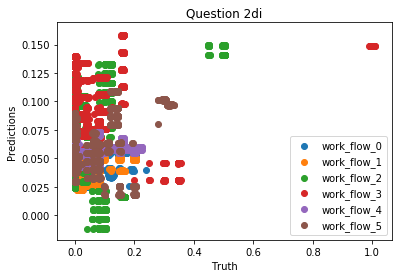

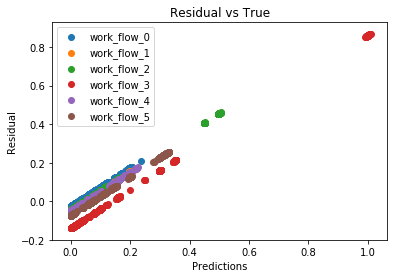

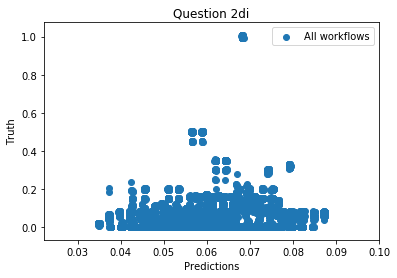

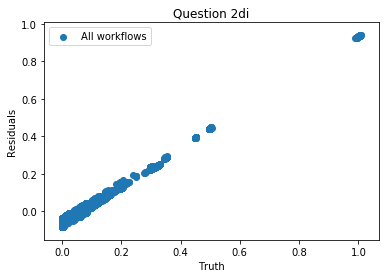

Its pretty bad in either case!


In [54]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
for idx in range(len(np.unique(X_data[:,2]))):
    label='work_flow_'+str(idx)
    ax1.scatter(true[idx],pred[idx],label=label)    
plt.xlabel('Truth')
plt.ylabel('Predictions')
plt.title('Question 2di')
plt.legend()
plt.show()


fig2=plt.figure()
ax2=fig2.add_subplot(111)
for idx in range(len(np.unique(X_data[:,2]))):
    label='work_flow_'+str(idx)
    ax2.scatter(true[idx], true[idx]-pred[idx][0],label=label)
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.title('Residual vs True')
plt.legend()
plt.show()
    
    
plt.scatter(y_pred_all,y_data,label='All workflows')
plt.xlabel('Predictions')
plt.ylabel('Truth')
plt.title('Question 2di')
plt.legend()
plt.show()

plt.scatter(y_data,y_data-y_pred_all,label='All workflows')
plt.ylabel('Residuals')
plt.xlabel('Truth')
plt.title('Question 2di')
plt.legend()
plt.show()

print('Its pretty bad in either case!')

In [55]:
#QUESTION 2dii
from sklearn.preprocessing import PolynomialFeatures
# Prepare the data:
#col 0 = Week #
#col 1 = Day of Week
#col 2 = day (??)
#col 3 = Hour of Day
#col 4 = Work flow ID
#col 5 = File Name/#
#col 6 = Size of Backup
#col 7 = Backuptime
X_data = dataset1.values[:, [0, 1, 2, 3, 4]]
y_data = dataset1.values[:, [5]] #backupsize = goal for prediction

poly_train_rmse_list=[]
poly_test_rmse_list=[]
for degree in range(10):
    polynomial_features= PolynomialFeatures(degree=10)
    x_poly = polynomial_features.fit_transform(X_data)

    linear_reg = LinearRegression()


    poly_cv_results = cross_validate(linear_reg, x_poly, y_data, cv=10,
                    scoring='neg_mean_squared_error', return_train_score=True)

    poly_train_mse = -poly_cv_results['train_score']
    poly_test_mse = -poly_cv_results['test_score']

    poly_train_rmse_list.append(np.sqrt(np.mean(poly_train_mse)))
    poly_test_rmse_list.append(np.sqrt(np.mean(poly_test_mse)))
    
poly_train_rmse_list
poly_test_rmse_list

[0.09502832823882365,
 0.09502832823882365,
 0.09502832823882365,
 0.09502832823882365,
 0.09502832823882365,
 0.09502832823882365,
 0.09502832823882365,
 0.09502832823882365,
 0.09502832823882365,
 0.09502832823882365]

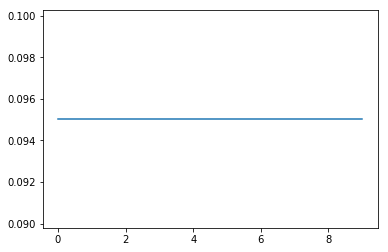

In [56]:
plt.plot(np.arange(10),poly_test_rmse_list)
plt.show()

In [57]:
#QUESTION 2dii
from sklearn.preprocessing import PolynomialFeatures
# Prepare the data:
#col 0 = Week #
#col 1 = Day of Week
#col 2 = day (??)
#col 3 = Hour of Day
#col 4 = Work flow ID
#col 5 = File Name/#
#col 6 = Size of Backup
#col 7 = Backuptime
X_data = dataset1.values[:, [0, 1, 2, 3, 4]]
y_data = dataset1.values[:, [5]] #backupsize = goal for prediction
#get all workflows
polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(X_data)
#get all workflows
linear_reg = LinearRegression()
linear_reg.fit(x_poly,y_data)
y_pred_all_ii=linear_reg.predict(x_poly)


#print('unique outputs\n',np.unique(y_data))
#print('unique flow IDs\n',np.unique(X_data[:,2]))
#print('All input data\n',X_data)
#print('------------------------\n'*2)
true_ii=[]
pred_ii=[]
label=[]
for flow in np.unique(X_data[:,2]):
    # 10 fold cross validation:
    this_flow=[]
    this_flow=x_poly[x_poly[:,2]==flow,:]
    #print('this flows dataset',this_flow)
    this_out=y_data[x_poly[:,2]==flow]
    #print('this flows output',this_out)
    #print('------------------------')
    linear_reg = LinearRegression()
    linear_reg.fit(this_flow,this_out)
    y_pred=linear_reg.predict(this_flow)
    true_ii.append(y_data[x_poly[:,2]==flow])
    pred_ii.append(y_pred)
    label.append(dataset1.values[0, [4]])

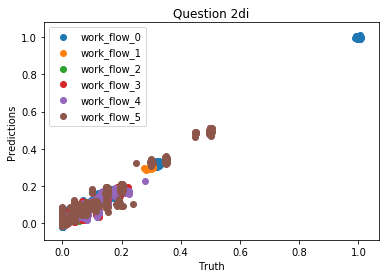

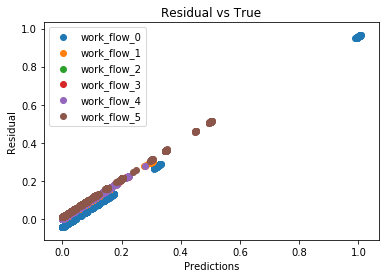

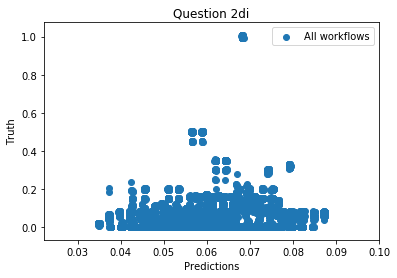

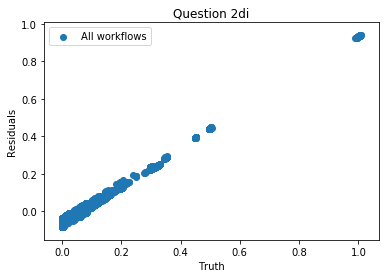

It looks better with indivual work flows but the residuals still look pretty much the same?


In [58]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
for idx in range(len(np.unique(X_data[:,2]))):
    label='work_flow_'+str(idx)
    ax1.scatter(true_ii[idx],pred_ii[idx],label=label)    
plt.xlabel('Truth')
plt.ylabel('Predictions')
plt.title('Question 2di')
plt.legend()
plt.show()


fig2=plt.figure()
ax2=fig2.add_subplot(111)
for idx in range(len(np.unique(X_data[:,2]))):
    label='work_flow_'+str(idx)
    ax2.scatter(true_ii[idx], true_ii[idx]-pred_ii[idx][0],label=label)
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.title('Residual vs True')
plt.legend()
plt.show()
    
    
plt.scatter(y_pred_all,y_data,label='All workflows')
plt.xlabel('Predictions')
plt.ylabel('Truth')
plt.title('Question 2di')
plt.legend()
plt.show()

plt.scatter(y_data,y_data-y_pred_all,label='All workflows')
plt.ylabel('Residuals')
plt.xlabel('Truth')
plt.title('Question 2di')
plt.legend()
plt.show()

print('It looks better with indivual work flows but the residuals still look pretty much the same?')

In [62]:
#QUESTION 2e
from sklearn import neighbors

knn_train_rmse_list=[]
knn_test_rmse_list=[]
for n_neighbors in range(1,30,2):
    knn = neighbors.KNeighborsRegressor(n_neighbors)
    
    knn_cv_results = cross_validate(knn, X_data, y_data, cv=10,
                    scoring='neg_mean_squared_error', return_train_score=True)

    knn_train_mse = -knn_cv_results['train_score']
    knn_test_mse = -knn_cv_results['test_score']

    knn_train_rmse_list.append(np.sqrt(np.mean(knn_train_mse)))
    knn_test_rmse_list.append(np.sqrt(np.mean(knn_test_mse)))
    
print('Averarge RMSE on Train dataset: ', knn_train_rmse_list)
print('Averarge RMSE on Test dataset:',knn_test_rmse_list)

Averarge RMSE on Train dataset:  [0.0, 0.032541161208775975, 0.03231514285298265, 0.033224125182415486, 0.039147175675480636, 0.04425601603255141, 0.04767293129555654, 0.05016294510679429, 0.05200975061641348, 0.05375712705574733, 0.05504509835873742, 0.056993432078291585, 0.0585027623125278, 0.059613807196396355, 0.06067726491736028]
Averarge RMSE on Test dataset: [0.020880712383796674, 0.03929454296108562, 0.041518307486868175, 0.04928439067135624, 0.05454849744272184, 0.05701673242530235, 0.05891371289412102, 0.0598019518006696, 0.06089835743734348, 0.061081038240735165, 0.061213067291675236, 0.061403025643797494, 0.061405164611773345, 0.06150913004452763, 0.06179169903710062]


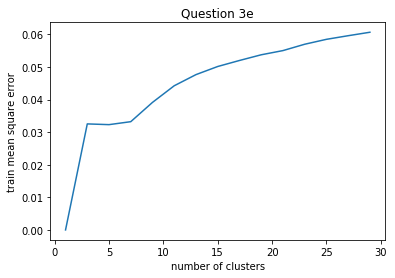

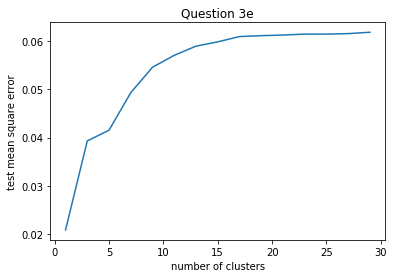

In [63]:
plt.plot(np.arange(1,30,2),knn_train_rmse_list)
plt.xlabel('number of clusters')
plt.ylabel('train mean square error')
plt.title('Question 3e')
plt.show()

plt.plot(np.arange(1,30,2),knn_test_rmse_list)
plt.xlabel('number of clusters')
plt.title('Question 3e')
plt.ylabel('test mean square error')
plt.show()

In [64]:
k_best=1

knn = neighbors.KNeighborsRegressor(k_best)
y_pred = knn.fit(X_data, y_data).predict(X_data)

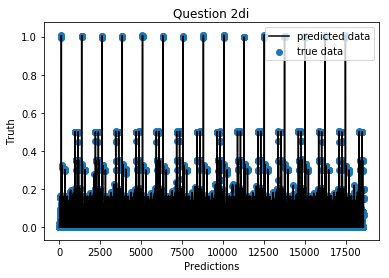

In [65]:
plt.scatter(np.arange(len(y_data)),y_data,label='true data')
plt.plot(np.arange(len(y_data)),y_pred,'k-',label='predicted data')
plt.xlabel('Predictions')
plt.ylabel('Truth')
plt.title('Question 2di')
plt.legend()
plt.show()

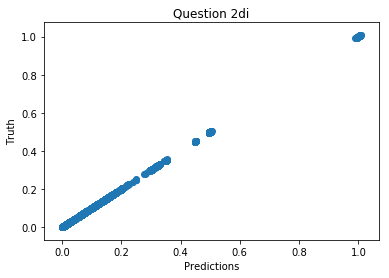

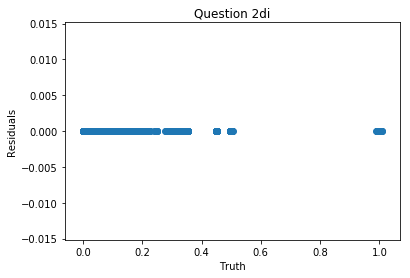

In [66]:
plt.scatter(y_pred,y_data)
plt.xlabel('Predictions')
plt.ylabel('Truth')
plt.title('Question 2di')
plt.show()

plt.scatter(y_data,y_data-y_pred)
plt.ylabel('Residuals')
plt.xlabel('Truth')
plt.title('Question 2di')
plt.show()



### Question 3

In [ ]:
#why on earth did kmeans do so well